## 로지스틱 회귀(Logistic Regression)
- https://wikidocs.net/22881
- 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification) -> 대표적인 알고리즘 로지스틱 회귀(Logistic Regression)

### 이진 분류(Binary Classification)
- 선형 회귀의 경우, 데이터를 가장 잘 표현하는 직선 찾기
- 이진 분류 문제의 경우, 직선 표현이 적절하지 않음
- 예) 
    - 시험 성적 x, 합불 결과 y,
    - 합격 1, 불합격 0
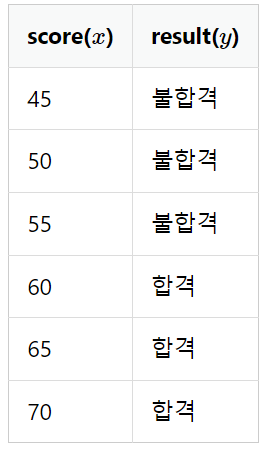
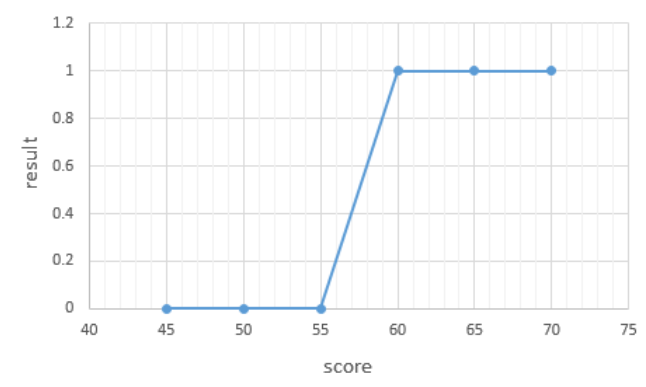
    - x와 y의 관계를 표현하기 위해서는 직선을 표현하는 함수가 아니라 S자 형태로 표현하는 함수 필요
        - 0과 1사이의 값을 확률로 해석하면 문제를 풀기가 훨씬 용이
        - 최종 예측값이 0.5보다 작으면 0으로 예측했다고 판단, 0.5보다 크면 1로 예측했다고 판단
        - 직선 표현의 경우, y 값이 음과 양의 무한대와 같은 큰 수를 가질 수 있기에 적절하지 않음
    - 시그모이드 함수(Sigmoid function): 출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수

### 시그모이드 함수(Sigmoid function)
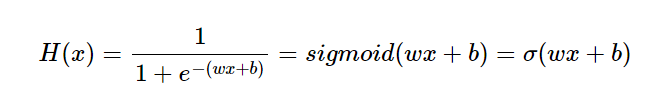
- 가장 적합한 가중치 w와 편향 b 구하기
- e(e=2.718281...)는 자연 상수라 불리는 숫자
    - 자연상수 e를 사용하는 이유: 주로 수학적인 편의성 때문
    - 시그모이드 함수를 식으로 표현할 때, e의 거듭제곱 형태로 표현하면 함수의 미분이 쉬워지기 때문
    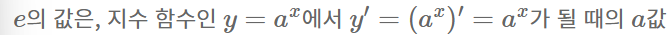

In [1]:
# 시그모이드 함수를 그래프로 시각화하기
import numpy as np
import matplotlib.pyplot as plt

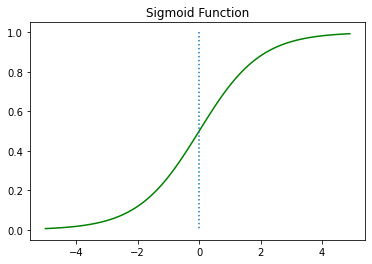

In [2]:
# w는 1, b는 0임을 가정
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환
- x가 0일 때 출력값은 0.5값을 가짐
- x가 증가하면 1에 수렴

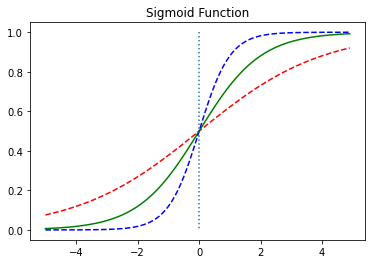

In [3]:
# 가중치 w와 편향 b 이 출력값에 어떤 영향을 미치는지 시각화
# w의 값을 변화시킴
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- w의 값에 따라 그래프의 경사도 변함
    - w의 값이 0.5일 때 빨간색선
    - w의 값이 1일 때 초록색선
    - w의 값이 2일 때 파란색선

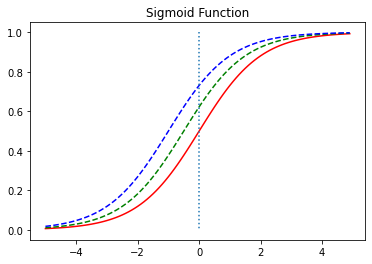

In [6]:
# b의 값에 따라서 그래프가 어떻게 변하는지 시각화
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = sigmoid(x+0.5)
y3 = sigmoid(x+1)

plt.plot(x, y1, 'r') # x 
plt.plot(x, y2, 'g', linestyle='--') # x + 0.5
plt.plot(x, y3, 'b', linestyle='--') # x + 1
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 비용 함수(Cost function)
- 로지스틱 회귀: 경사 하강법 사용해 가중치 w를 찾아냄
- 하지만 비용함수로는 평균 제곱 오차를 사용하지 않음
    - 평균 제곱 오차 사용시, 로컬 미니멈 문제 발생 가능성 높음
    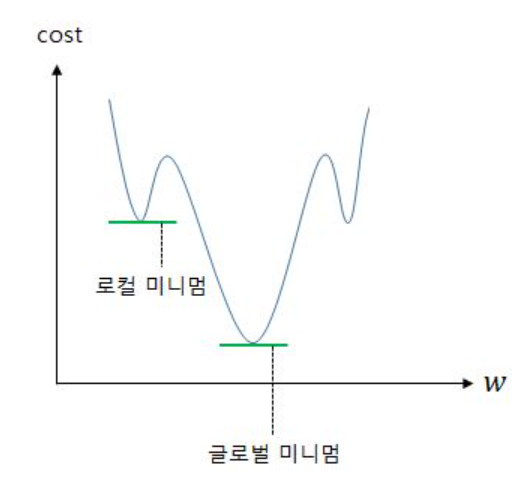
- 목적함수 J: 가중치를 최소로 만드는 적절한 비용함수
    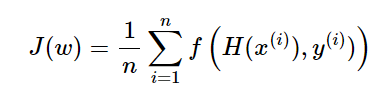
    - 샘플 데이터의 개수 n
    - 어떤 함수 f가 실제가 yi 와 예측값 H(xi)의 오차를 나타내는 함수
    - 결국 f도 하나의 비용함수임. 그래서 아래와 같이 식을 쓸 수 있음
    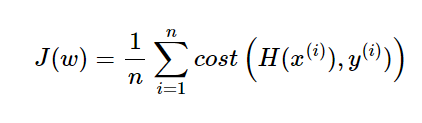
- 시그모이드 함수는 0과 1 사이의 y 값을 반환
    - 실제값이 0 일때, y 값이 1에 가까워지면 오차가 커짐
    - 실제값이 1 일때, y 값이 0에 가까워지면 오차가 커짐
    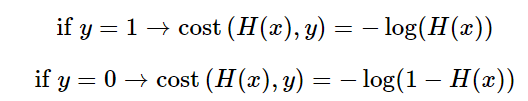
    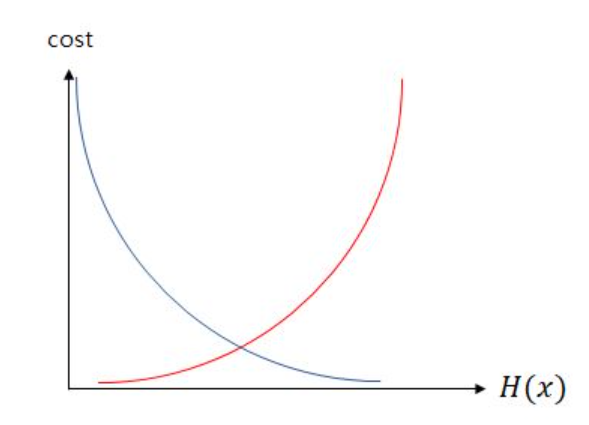
    - 실제값 y가 1일 때 파란색 선으로 표현
    - 실제값 y가 0일 때 빨간색 선으로 표현
        - 실제값이 1일 때, 예측값 H(x)의 값이 1이면 오차가 0이므로 cost는 0, 반면 예측값 H(x)가 0으로 수렴하면 cost는 무한대로 발산
        - 반대의 경우 반대
    - 하나의 식으로 표현하기_로즈스틱 회귀의 목적함수
    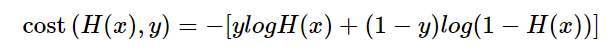
    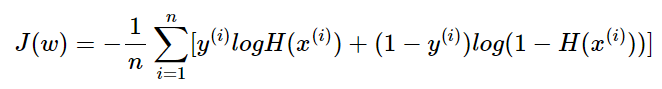
- 크로스 엔트로피 (Cross Entropy)함수: 로지스틱 회귀에서 찾아낸 비용 함수
- 소프트맥스 회귀의 비용함수이기도 함